In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/Stores.csv')

In [ ]:
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [ ]:
df.dtypes

,0
Store ID,int64
Store_Area,int64
Items_Available,int64
Daily_Customer_Count,int64
Store_Sales,int64


In [ ]:
df.shape

(896, 5)

In [ ]:
df["Store_Sales"].idxmax()

649

In [ ]:
df.iloc[649]

,649
Store ID,650
Store_Area,1989
Items_Available,2414
Daily_Customer_Count,860
Store_Sales,116320


In [ ]:
df["Store_Sales"].idxmin()

31

In [ ]:
df.iloc[31]

,31
Store ID,32
Store_Area,1250
Items_Available,1508
Daily_Customer_Count,990
Store_Sales,14920


In [ ]:
df= df.drop("Store ID ", axis="columns")

In [ ]:
df.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

,0
Store_Area,0
Items_Available,0
Daily_Customer_Count,0
Store_Sales,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_Area            896 non-null    int64
 1   Items_Available       896 non-null    int64
 2   Daily_Customer_Count  896 non-null    int64
 3   Store_Sales           896 non-null    int64
dtypes: int64(4)
memory usage: 28.1 KB


In [ ]:
df.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


In [ ]:
df.corr()["Store_Sales"].sort_values()

,Store_Sales
Daily_Customer_Count,0.008629
Store_Area,0.097474
Items_Available,0.098849
Store_Sales,1.000000


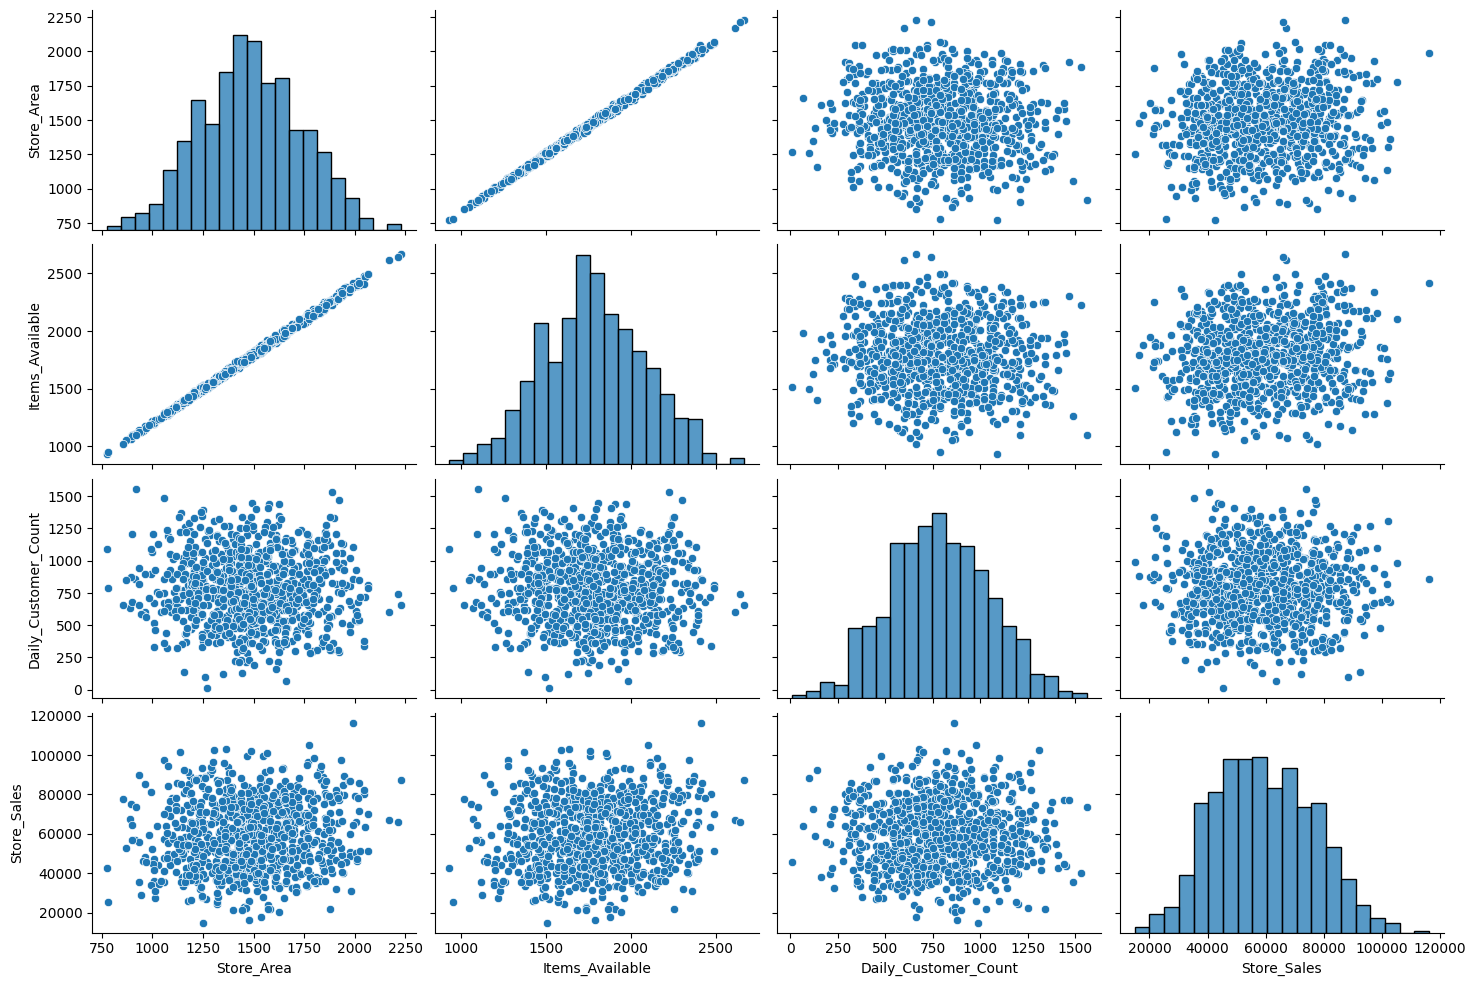

In [ ]:
sns.pairplot(df,aspect=1.5)
plt.show()

<Figure size 4000x2000 with 0 Axes>

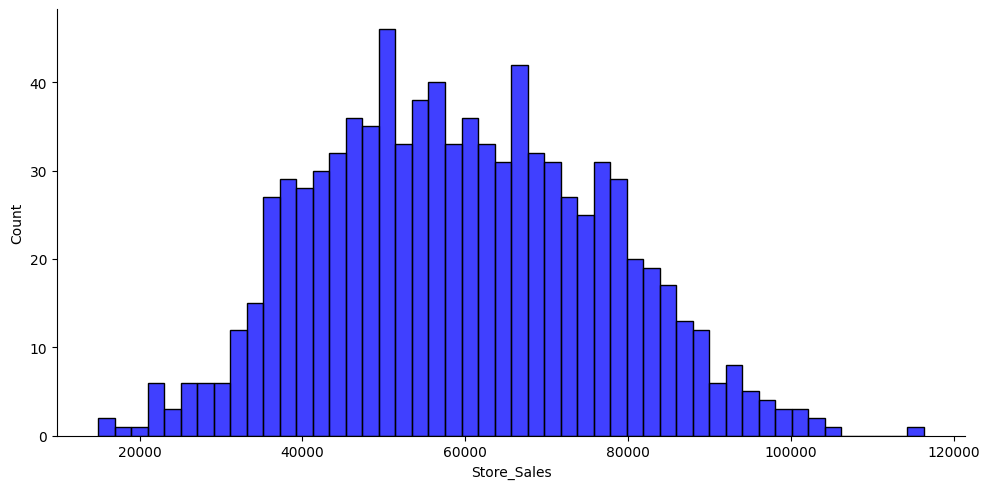

In [ ]:
plt.figure(figsize=(20,10), dpi=200)
sns.displot(data=df, x='Store_Sales', bins=50,color="blue",aspect=2)
plt.show()

In [ ]:
df.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


In [ ]:
iqr_dcc = 970-600
upper_limit = 970 + 1.5*iqr_dcc
lower_limit = 600 - 1.5*iqr_dcc
df.loc[df["Daily_Customer_Count"] > upper_limit] =np.nan
df.loc[df["Daily_Customer_Count"] < lower_limit] =np.nan

In [ ]:
df = df.dropna()

In [ ]:
x=df.drop('Store_Sales',axis=1)
y=df['Store_Sales']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [ ]:
scalar=StandardScaler()
scaled_x_train=scalar.fit_transform(x_train)
scaled_x_test=scalar.transform(x_test)

In [ ]:
 def modelresults(predictions):
  print('mean absolute error is {}'.format(mean_absolute_error(y_test,predictions)))
  print('mean squared error is {}'.format(np.sqrt(mean_squared_error(y_test,predictions))))

In [ ]:
lr = LinearRegression()
lr.fit(scaled_x_train,y_train)
predictions_lr=lr.predict(scaled_x_test)
modelresults(predictions_lr)

mean absolute error is 14342.719130061356
mean squared error is 17333.756382250904


In [ ]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(scaled_x_train,y_train)
predictions_svr=svr.predict(scaled_x_test)
modelresults(predictions_svr)

mean absolute error is 14433.763723899669
mean squared error is 17436.70329922418


In [ ]:
from sklearn.model_selection import GridSearchCV
g_svr = SVR()
param_grid = {'C': [0.001,0.01,0.1,0.5],'kernel':['linear','rbf','poly'],'gamma':['scale','auto'],'degree':[2,3,4,5]}
grid_svr = GridSearchCV(g_svr,param_grid)
grid_svr.fit(scaled_x_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5], 'degree': [2, 3, 4, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [ ]:
print('Parameters for Model is {}'.format(grid_svr.best_params_))

Parameters for Model is {'C': 0.5, 'degree': 5, 'gamma': 'auto', 'kernel': 'poly'}


In [ ]:
predsgridsvr=grid_svr.predict(scaled_x_test)
modelresults(predsgridsvr)

mean absolute error is 14333.597741631645
mean squared error is 17333.679667946755


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(scaled_x_train,y_train)
predictions_rf=rf.predict(scaled_x_test)
modelresults(predictions_rf)

mean absolute error is 15739.044402985077
mean squared error is 19134.7850207914


In [ ]:
rfmodel = RandomForestRegressor()
param_gridrf ={'bootstrap':[True], 'max_depth':[5,10,15], 'max_features':['auto','log2'],'n_estimators':[2,3,4,5,6]}
grid_rf = GridSearchCV(rfmodel,param_gridrf)
grid_rf.fit(scaled_x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [2, 3, 4, 5, 6]})

In [ ]:
print('Parameters for Model is {}'.format(grid_rf.best_params_))

Parameters for Model is {'bootstrap': True, 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 5}


In [ ]:
modelresults(grid_rf.predict(scaled_x_test))

mean absolute error is 14827.678829656674
mean squared error is 17842.898807269263
